In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import seaborn as sns

### Importing the dataset

In [76]:
#read Data
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [77]:
#show Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data Preprocessing

In [78]:
dataset_cop = df.copy()

In [79]:
dataset_cop['sex'] =dataset_cop['sex'].replace(0, 'Male')
dataset_cop['sex'] =dataset_cop['sex'].replace(1, 'Female')

In [80]:
dataset_cop.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,Female,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,Female,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,Male,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,Female,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,Male,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
dataset_cop['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [82]:
dataset_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


In [83]:
from sklearn.preprocessing import LabelEncoder
leEncoder= LabelEncoder()
dataset_cop['sex'] = leEncoder.fit_transform(df['sex'])

In [84]:
dataset_cop.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Handling missing value

In [85]:
#check for NULL values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [86]:
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [87]:
#replace Null by 120
df['trtbps'].fillna(value=120,inplace=True)

In [88]:
df['trtbps'].unique()

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [89]:
# Recheck for Null in the dataset
df.isna().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [90]:
print(f"Shape is: {df.shape}")

print(f"Summary statistics: {df.describe()}")

Shape is: (303, 14)
Summary statistics:               age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340   

In [91]:
#checking the maximum correlation of the output with other variables
df.corr().abs()['output'].sort_values(ascending = False)

output      1.000000
exng        0.436757
cp          0.433798
oldpeak     0.430696
thalachh    0.421741
caa         0.391724
slp         0.345877
thall       0.344029
sex         0.280937
age         0.225439
trtbps      0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: output, dtype: float64

In [92]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


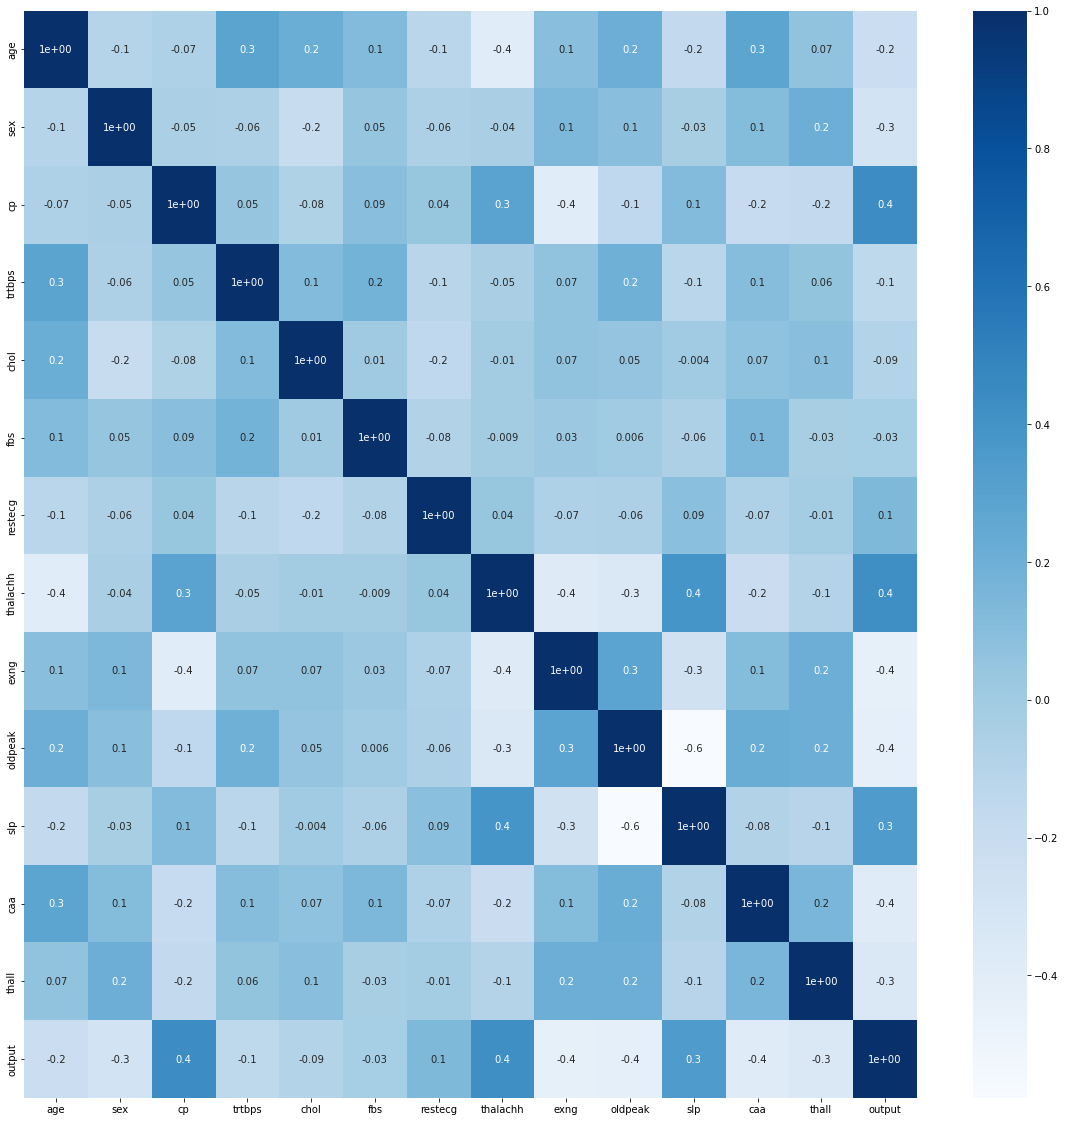

In [93]:
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True, cmap='Blues' ,  fmt='.1')
plt.show()

## Splitting the dataset into the Training set and Test set

In [94]:
#put output in 'y'
X = df.drop('output', axis = 1)
y = df['output']

In [95]:
#split Dataset for test and train

from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Splitting the Training Set into Training and Validation Sets

In [96]:
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

In [97]:
print("X_train shape: {}".format(X_train.shape))

print("y_train shape: {}".format(y_train.shape))

print("X_test shape: {}".format(X_test.shape))

print("y_test shape: {}".format(y_test.shape))

print("X_validation shape: {}".format(X_validation.shape))

print("y_validation shape: {}".format(y_validation.shape))

X_train shape: (193, 13)
y_train shape: (193,)
X_test shape: (61, 13)
y_test shape: (61,)
X_validation shape: (49, 13)
y_validation shape: (49,)


## Feature Scaling

In [98]:
#data scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_validation = sc.transform(X_validation)

## Building The ANN Model 

In [99]:
#ANN Model
ann = tf.keras.models.Sequential()

In [100]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [101]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [102]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [103]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Training The ANN Model on the Training set

In [104]:
history=ann.fit(X_train, y_train, batch_size =20, epochs =100)

Epoch 1/100
10/10 [==============================] - 0s 786us/step - loss: 0.7157 - accuracy: 0.4456
Epoch 2/100
10/10 [==============================] - 0s 722us/step - loss: 0.7019 - accuracy: 0.4611
Epoch 3/100
10/10 [==============================] - 0s 675us/step - loss: 0.6906 - accuracy: 0.5026
Epoch 4/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6802 - accuracy: 0.5440
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6703 - accuracy: 0.6010
Epoch 6/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6615 - accuracy: 0.6269
Epoch 7/100
10/10 [==============================] - 0s 997us/step - loss: 0.6522 - accuracy: 0.6218
Epoch 8/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6429 - accuracy: 0.6477
Epoch 9/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6330 - accuracy: 0.6580
Epoch 10/100
10/10 [==============================] - 0s 1ms/step - loss: 0.6230 - accuracy: 0.6580
E

10/10 [==============================] - 0s 997us/step - loss: 0.2870 - accuracy: 0.8808
Epoch 83/100
10/10 [==============================] - 0s 886us/step - loss: 0.2858 - accuracy: 0.8808
Epoch 84/100
10/10 [==============================] - 0s 997us/step - loss: 0.2841 - accuracy: 0.8808
Epoch 85/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2828 - accuracy: 0.8808
Epoch 86/100
10/10 [==============================] - 0s 1ms/step - loss: 0.2818 - accuracy: 0.8808
Epoch 87/100
10/10 [==============================] - 0s 886us/step - loss: 0.2806 - accuracy: 0.8808
Epoch 88/100
10/10 [==============================] - 0s 886us/step - loss: 0.2792 - accuracy: 0.8860
Epoch 89/100
10/10 [==============================] - 0s 997us/step - loss: 0.2780 - accuracy: 0.8860
Epoch 90/100
10/10 [==============================] - 0s 997us/step - loss: 0.2766 - accuracy: 0.8860
Epoch 91/100
10/10 [==============================] - 0s 776us/step - loss: 0.2753 - accuracy: 0.88

## Predicting the Validation set results

In [105]:
y_pred_val = ann.predict(X_validation)
y_pred_val = (y_pred_val > 0.5)
accuracy_score(y_validation, y_pred_val)

0.7959183673469388

## Predicting a new result

In [106]:
#test model
print(ann.predict(sc.transform([[20,1,3,120,200,0,1,144,0,2.5,2,0,2]])))

[[0.9767419]]


## Predicting the Test set results

In [107]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

## Making the Confusion Matrix

In [108]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[25  4]
 [ 3 29]]


0.8852459016393442

### Making the ROC Curve

In [109]:
# roc curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [110]:
y_pred = ann.predict(X_test).ravel()

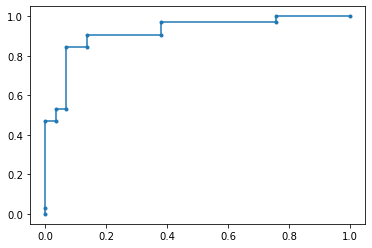

In [111]:
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test  , y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

### Making the Loss Curve

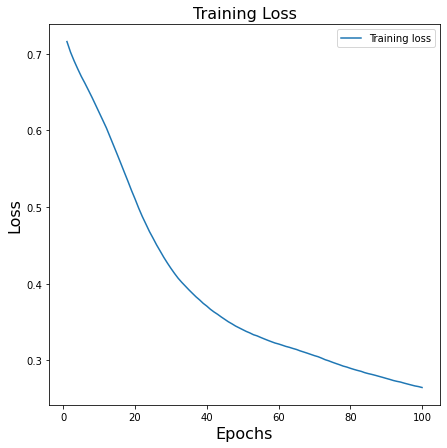

In [112]:
#loss curve
classifier_dict = history.history
loss_values = classifier_dict['loss']
 
epochs = range(1, len(loss_values) + 1)
fig, ax = plt.subplots(figsize=(7, 7))

 

# Plot the loss vs Epochs

 

ax.plot(epochs, loss_values, '-', label='Training loss')
ax.set_title('Training Loss', fontsize=16)
ax.set_xlabel('Epochs', fontsize=16)
ax.set_ylabel('Loss', fontsize=16)
ax.legend()